# Modeling data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statistics import mean
from matplotlib import style
style.use('fivethirtyeight')

def compound_interest(principal, rate, time, times_compounded):
        return principal * (1 + rate/times_compounded) ** (time * times_compounded)

In [2]:
years = np.linspace(0, 40, 401)
amount = compound_interest(500, 0.07, years, 12)

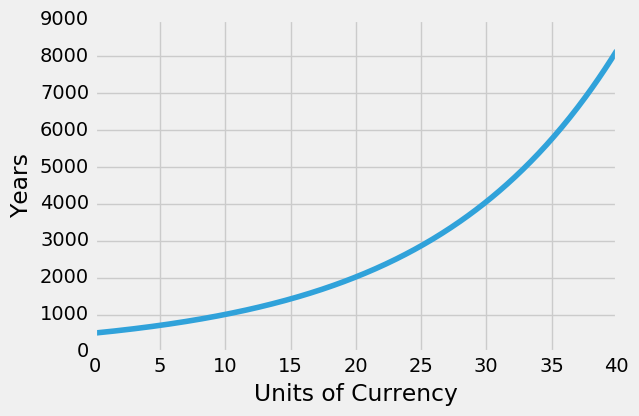

In [3]:
plt.plot(years, amount)
plt.xlabel('Units of Currency')
plt.ylabel('Years')
plt.show()

Let's fit a line to some data

In [4]:
!ls

goog_1yr.csv  live.csv	most_backed.csv  Regression.ipynb


In [5]:
data = pd.read_csv('goog_1yr.csv')

In [6]:
data

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Adj Close,Years Since 2009,Daily Avg,Daily Range
0,0,2009-12-31,624.751096,625.401047,619.981079,619.981079,2448700,309.680858,0.997260,622.691063,5.419968
1,1,2009-12-30,618.501062,622.731037,618.011072,622.731037,2942100,311.054464,0.994521,620.371055,4.719965
2,2,2009-12-29,624.741049,624.841093,618.291049,619.401092,2860200,309.391155,0.991781,621.566071,6.550044
3,3,2009-12-28,621.661061,625.991080,618.481090,622.871087,3408400,311.124419,0.989041,622.236085,7.509990
4,4,2009-12-24,612.931058,619.521047,612.271061,618.481090,1723800,308.931613,0.978082,615.896054,7.249986
5,5,2009-12-23,603.501053,612.871081,602.851041,611.681027,4160800,305.534978,0.975342,607.861061,10.020040
6,6,2009-12-22,601.341005,601.501027,598.851051,601.121006,3775600,300.260243,0.972603,600.176039,2.649976
7,7,2009-12-21,597.611006,599.841017,595.671019,598.681044,5161600,299.041480,0.969863,597.756018,4.169998
8,8,2009-12-18,596.031006,598.931001,595.001035,596.421013,7089400,297.912594,0.961644,596.966018,3.929966
9,9,2009-12-17,596.441047,597.641025,593.760990,593.941045,5297300,296.673849,0.958904,595.701008,3.880035


In [7]:
x = data['Years Since 2009']

In [8]:
y = data['Daily Avg']

In [9]:
def best_fit_linear(xs, ys):
    """Return slope and intercept for line of best fit."""
    slope = (((mean(xs) * mean(ys)) - mean(xs * ys)) /
             (mean(xs) ** 2 - mean(xs ** 2)))
    intercept = mean(ys) - slope * mean(xs)
    return slope, intercept

In [10]:
def squared_error(ys_orig, ys_line):
    """Return standard error."""
    return sum((ys_line - ys_orig) ** 2)


def coefficient_of_determination(ys_orig, ys_line):
    """Return r squared (correlation coefficient)."""
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    sq_error_regr = squared_error(ys_orig, ys_line)
    sq_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (sq_error_regr / sq_error_y_mean)

In [11]:
m, b = best_fit_linear(x, y)
print('The equation for the linear model is: y = {}x + {}'.format(m, b))

The equation for the linear model is: y = 302.0153438305815x + 287.59810765950414


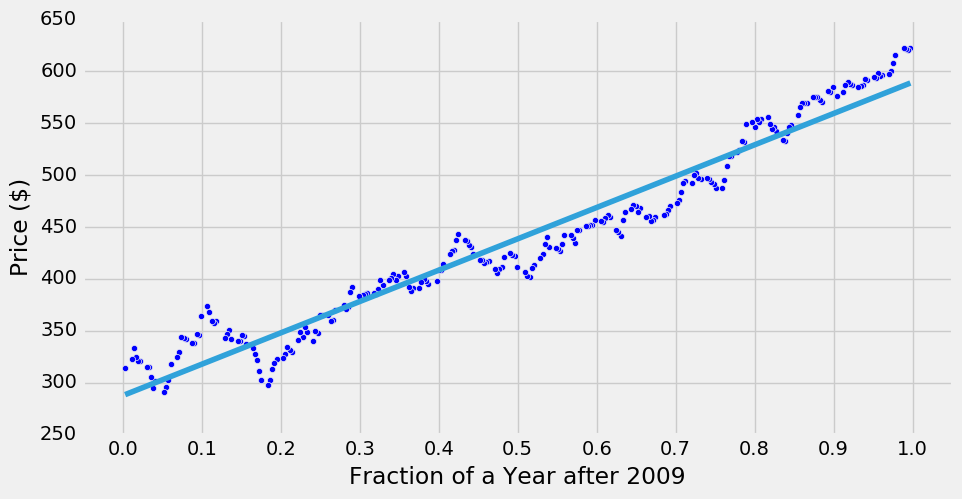

r^2 = 0.947238303821


In [142]:
regression_line_ys = [m * x0 + b for x0 in x]

plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.xticks(np.arange(0, max(x)+.1, .1))
plt.xlabel('Fraction of a Year after 2009')
plt.ylabel('Price ($)')
plt.plot(x, regression_line_ys)
plt.show()
r_squared = coefficient_of_determination(y, regression_line_ys)
print('r^2 =', r_squared)

# Gradient of descent algorithm
First, let's use our old best_fit model to pick our starting value, and choose our learning_rate as 1 / # of data pts

In [13]:
def step_gradient(old_m, old_b, xs, ys, learning_rate):

    b_grad = -(2/len(xs)) * (ys - (old_m * xs + old_b)).sum()
    m_grad = -(2/len(xs)) * (xs * (ys - (old_m * xs + old_b))).sum()

    new_b = old_b - (learning_rate * b_grad)
    new_m = old_m - (learning_rate * m_grad)

    return new_b, new_m

In [14]:
# b1, m1 = step_gradient(m, b, x, y, 1, len(x))
b1, m1 = step_gradient(1, 1, x, y, 1)
b2, m2 = step_gradient(m1, b1, x, y, 1)
b3, m3 = step_gradient(m2, b2, x, y, 1)
1 / (10 * len(x))

0.0003968253968253968

In [15]:
new_m, new_b = best_fit_linear(x, y)
results = []
for i in range(1, 1000):
    regression_line_ys = [new_m * x0 + new_b for x0 in x]
    sq_e = (squared_error(y, regression_line_ys)) ** 0.5 # rooted for ease of reading if checking output
    results.append((sq_e, new_b, new_m))
    new_b, new_m = step_gradient(new_b, new_m, x, y, 1/(100 * len(x)))


In [16]:
results

[(324.42403185769575, 287.59810765950414, 302.01534383058151),
 (350.05947859484979, 302.01477408162242, 287.59791567124819),
 (324.42403195679418, 287.59791570918782, 302.01477410438787),
 (350.05620083794884, 302.01420440829366, 287.59772374872585),
 (324.42403225400705, 287.59772382459693, 302.0142044538199),
 (350.05292387695721, 302.013634810582, 287.59753189192423),
 (324.42403274921037, 287.59753200571851, 302.01363487886448),
 (350.04964771164742, 302.01306528847425, 287.59734010083031),
 (324.42403344228114, 287.59734025253954, 302.01306537950825),
 (350.04637234179205, 302.0124958419571, 287.59714837543106),
 (324.42403433309494, 287.59714856504706, 302.01249595573807),
 (350.0430977671644, 302.01192647101732, 287.59695671571359),
 (324.42403542152886, 287.59695694322807, 302.0119266075406),
 (350.039823987538, 302.01135717564171, 287.59676512166482),
 (324.42403670745898, 287.59676538706964, 302.0113573349027),
 (350.0365510026852, 302.01078795581697, 287.59657359327184),
 (

In [17]:
best_result = min(results)
m_n, b_n = best_result[2], best_result[1]

In [18]:
best_result

(324.42403185769575, 287.59810765950414, 302.01534383058151)

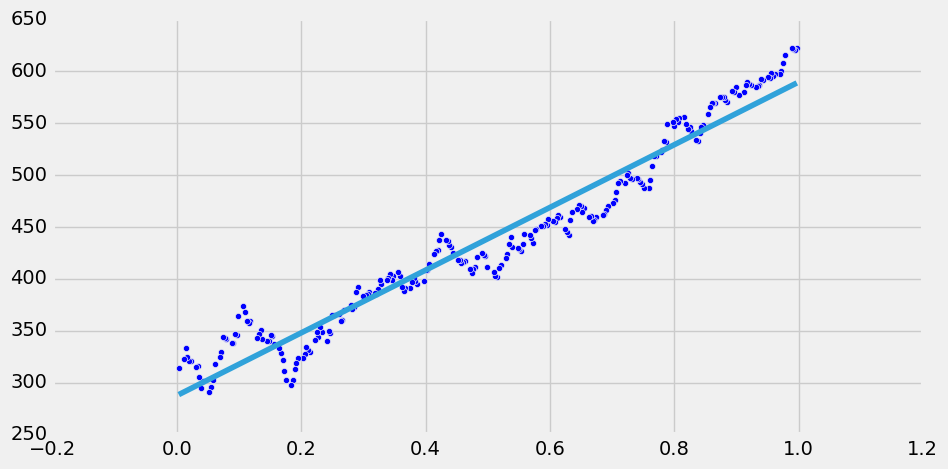

The equation for the linear model is: y = 302.0153438305815x + 287.59810765950414
r^2 = 0.947238303821


In [140]:
regression_line_ys_n = [m_n * x0 + b_n for x0 in x]

plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.plot(x, regression_line_ys_n)
plt.show()
r_squared_n = coefficient_of_determination(y, regression_line_ys_n)
print('The equation for the linear model is: y = {}x + {}'.format(m_n, b_n))
print('r^2 =', r_squared_n)


## kickstarter data time

In [138]:
k_data = pd.read_csv('most_backed.csv')
k_data.columns

Index(['Unnamed: 0', 'amt.pledged', 'blurb', 'by', 'category', 'currency',
       'goal', 'location', 'num.backers', 'num.backers.tier', 'pledge.tier',
       'title', 'url'],
      dtype='object')

In [21]:
x_k = np.log(k_data['num.backers'])
y_k = np.log(k_data['amt.pledged'])

The equation for the linear model is: y = 1.0068493521359005x + 4.028253306936002
r^2 = 0.470827686834
note that each axis is the natural log of the original data


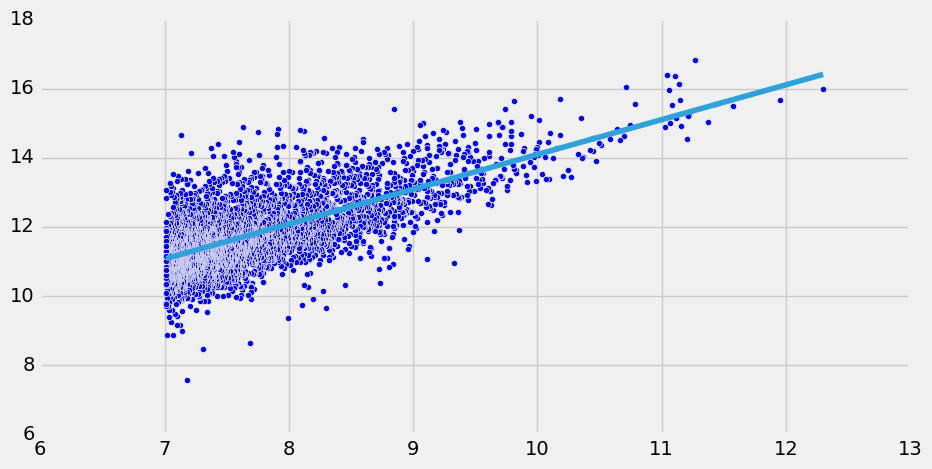

In [22]:
new_m_k, new_b_k = best_fit_linear(x_k, y_k)
results_k = []
for i in range(1, 1000):
    regression_line_ys_k = [new_m_k * x0 + new_b_k for x0 in x_k]
    sq_e_k = (squared_error(y_k, regression_line_ys_k)) ** 0.5 # rooted for ease of reading if checking output
    results_k.append((sq_e_k, new_b_k, new_m_k))
    new_b_k, new_m_k = step_gradient(new_b_k, new_m_k, x_k, y_k, 1/(10000 * len(x_k)))

best_result_k = min(results_k)
m_n_k, b_n_k = best_result_k[2], best_result_k[1]
regression_line_ys_n_k = [m_n_k * x0 + b_n_k for x0 in x_k]
r_squared_n_k = coefficient_of_determination(y_k, regression_line_ys_n_k)

print('The equation for the linear model is: y = {}x + {}'.format(m_n_k, b_n_k))
print('r^2 =', r_squared_n_k)
print('note that each axis is the natural log of the original data')

plt.figure(figsize=(10,5))
plt.scatter(x_k, y_k)
plt.plot(x_k, regression_line_ys_n_k)
plt.show()

# scikit learn!

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
regress = LinearRegression()
regress.fit(data["Years Since 2009"].reshape(-1, 1), data["Daily Avg"])

/home/david/codefellows/501/ENV/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
slope = regress.coef_
intercept = regress.intercept_

/home/david/codefellows/501/ENV/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


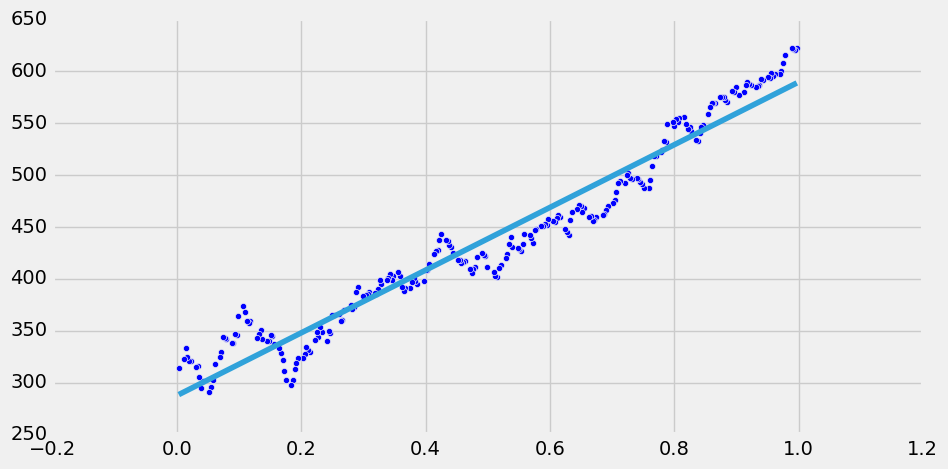

In [41]:
plt.figure(figsize=(10,5))
plt.scatter(data["Years Since 2009"], data["Daily Avg"])
# plt.plot(data["Years Since 2009"], slope*data["Years Since 2009"] + intercept)
plt.plot(data["Years Since 2009"], regress.predict(data['Years Since 2009'].reshape(-1, 1)))
plt.show()

# with google data

In [27]:
regress.predict([[2.0]])

array([ 891.62879532])

In [28]:
regress2 = LinearRegression()
regress2.fit(data[["Years Since 2009", "Volume"]], data["Daily Avg"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

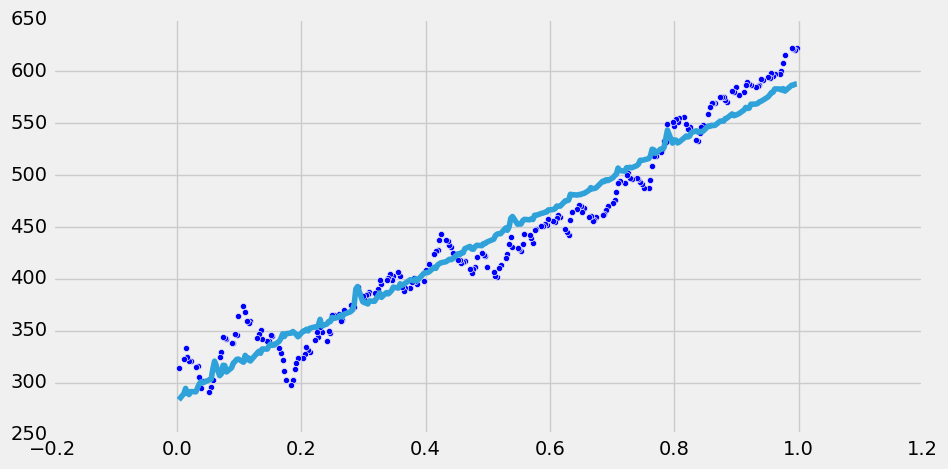

In [35]:
plt.figure(figsize=(10,5))
plt.scatter(data["Years Since 2009"], data["Daily Avg"])
plt.plot(data["Years Since 2009"], regress2.predict(data[['Years Since 2009', 'Volume']]))
plt.show()

# now, lets use our kickstarter data

/home/david/codefellows/501/ENV/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
/home/david/codefellows/501/ENV/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


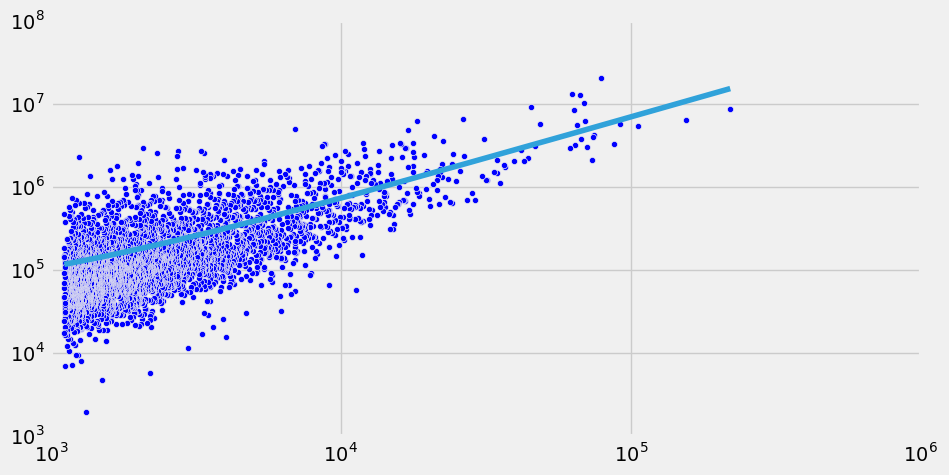

In [30]:
regress_k = LinearRegression()
regress_k.fit(k_data["num.backers"].reshape(-1, 1), k_data["amt.pledged"])

plt.figure(figsize=(10,5))
plt.scatter(k_data["num.backers"], k_data["amt.pledged"])
plt.plot(k_data["num.backers"], regress_k.predict(k_data['num.backers'].reshape(-1, 1)))
plt.xscale('log')
plt.yscale('log')
plt.show()

In [31]:
regress.predict([[10 ** 5.5]])

array([ 95505925.08045959])

In [32]:
print(np.log(10 ** 5.5))
np.log(95505925.08)

12.6642180115


18.374698846248901

In [33]:
# now with more columns

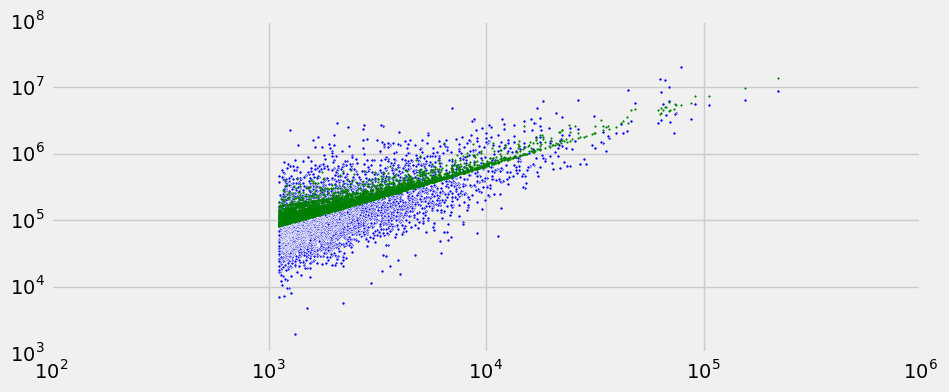

In [93]:
from matplotlib import style
style.use('fivethirtyeight')

regress_l = LinearRegression()
regress_l.fit(k_data[["num.backers", 'goal']], k_data["amt.pledged"])

plt.figure(figsize=(10,4))
plt.scatter(k_data["num.backers"], k_data["amt.pledged"], s=5)
plt.scatter(k_data["num.backers"], regress_l.predict(k_data[['num.backers', 'goal']]), color='green', s=1)
plt.xscale('log')
plt.yscale('log')
plt.show()

## evaluate the fit

In [64]:
chi_sq = sum((data["Daily Avg"] - regress.predict(data["Years Since 2009"].reshape(-1, 1)))**2/(data["Daily Range"]**2))

/home/david/codefellows/501/ENV/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


In [65]:
chi_sq_dof = chi_sq / (len(data) - 2)
chi_sq_dof

7.681517498359919

In [72]:
# now another dimension, see how chi sq dof is lower, so a better fit with extra parameter
chi_sq = sum((data["Daily Avg"] - regress2.predict(data[["Years Since 2009", "Volume",]]))**2/(data["Daily Range"]**2))
chi_sq_dof2 = chi_sq / (len(data) - 3)
chi_sq_dof2

7.2021595409752823

In [110]:
def chi_squared(observed_data, expected_model):
    return sum((observed_data - expected_model) ** 2 / expected_model)

def chi_squared_dof(observed_data, expected_model, dof):
    return (1 / (len(observed_data) - 2)) * sum((observed_data - expected_model) ** 2 / expected_model)

def AIC(observed_data, expected_model, k):
    return -(sum((observed_data - expected_model) ** 2 / expected_model)) + 2*k + ((2*k) * (k+1)) / (len(data) - k - 1)

In [107]:
chi_squared_dof(data['Daily Avg'], regress2.predict(data[['Years Since 2009', 'Volume']]), 3)

1.0003846211627778

In [109]:
AIC(data['Daily Avg'], regress2.predict(data[['Years Since 2009', 'Volume']]), 3)

-243.99938109714608

In [113]:
chi_squared_dof(data['Daily Avg'], regress.predict(data['Years Since 2009'].values.reshape(-1,1)), 2)

1.0244325494326727

In [114]:
AIC(data['Daily Avg'], regress.predict(data['Years Since 2009'].values.reshape(-1,1)), 2)

-252.05994458708383

In [115]:
print(AIC(data['Daily Avg'], regress.predict(data['Years Since 2009'].values.reshape(-1,1)), 3))
print(AIC(data['Daily Avg'], regress.predict(data['Years Since 2009'].values.reshape(-1,1)), 4))
print(AIC(data['Daily Avg'], regress.predict(data['Years Since 2009'].values.reshape(-1,1)), 5))

-250.011363165
-247.946194038
-245.864234919


In [119]:
k_data2 = pd.read_csv('live.csv')

In [122]:
chi_squared_dof(k_data['amt.pledged'], regress_k.predict(k_data['num.backers'].values.reshape(-1,1)), 2)

299868.23168343748

In [125]:
AIC(k_data['amt.pledged'], regress_k.predict(k_data['num.backers'].values.reshape(-1,1)), 2)

-1198873186.2221904

In [126]:
chi_squared_dof(k_data2['amt.pledged'], regress_k.predict(k_data['num.backers'].values.reshape(-1,1)), 2)

274504.18647236488

In [127]:
AIC(k_data2['amt.pledged'], regress_k.predict(k_data['num.backers'].values.reshape(-1,1)), 2)

-1097467733.468322